In [1]:
# http://datacamp-community-prod.s3.amazonaws.com/dbed353d-2757-4617-8206-8767ab379ab3

import csv 
import pandas as pd
import lyricsgenius
import numpy as np
import matplotlib.pyplot as plt

In [2]:
songs = pd.read_csv('2020_popsongs_structure.csv')
songs['Structure'].head()

0    ['Intro', 'Verse 1', 'Pre-Chorus', 'Chorus', '...
1    ['Verse 1', 'Pre-Chorus', 'Chorus', 'Verse 2',...
2    ['Intro', 'Verse 1', 'Chorus', 'Verse 2', 'Cho...
3    ['Intro', 'Verse 1', 'Pre-Chorus', 'Chorus', '...
4    ['Verse 1', 'Pre-Chorus', 'Chorus', 'Verse 2',...
Name: Structure, dtype: object

In [18]:
# returns histogram for number of times a 
# part of the song was repeated for all the songs
def histogram_for_song_structure(string_of_part):
    structure_times = []
    for row in range(len(songs['Structure'])):
        number = songs['Structure'][row].count(string_of_part)
        structure_times.append(number)
    plt.hist(structure_times)
    plt.title('Histogram of verses in the dataset')
    plt.xlabel('Number of verses in a song')
#     plt.title('Histogram of '+str(string_of_part))
#     plt.xlabel('Number of '+str(string_of_part)+' in a song')

# returns the array for the
def array_for_song_structure(string_of_part):
    structure_times = []
    for row in range(len(songs['Structure'])):
        number = songs['Structure'][row].count(string_of_part)
        structure_times.append(number)
    return structure_times

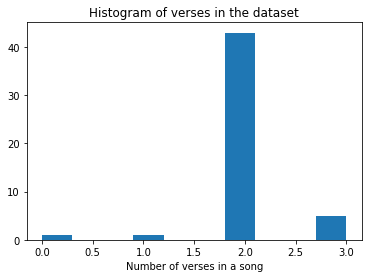

In [19]:
#histogram_for_song_structure("'Chorus") # i use the ' to distinguish from Pre-Chorus and Post-Chorus
histogram_for_song_structure('Verse')
#histogram_for_song_structure('Pre-Chorus')
#histogram_for_song_structure('Outro')
#histogram_for_song_structure('Intro')

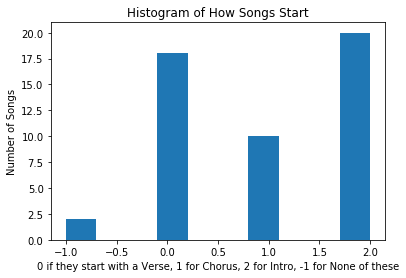

48 songs start with either a Verse, Chorus, or Intro.
36.0% of songs start with a Verse.
20.0% of songs start with a Chorus.
40.0% of songs start with an Intro.


In [158]:
# seeing how many start with an intro, verse, or chorus

starts = []
verse = 0
chorus = 0
intro = 0

for row in range(len(songs['Structure'])):
    if songs['Structure'][row].find('Verse') == 2:
        starts.append(0)
        verse += 1
    elif songs['Structure'][row].find('Chorus') == 2:
        starts.append(1)
        chorus += 1
    elif songs['Structure'][row].find('Intro') == 2:
        starts.append(2)
        intro += 1
    else: 
        starts.append(-1)

plt.hist(starts)
plt.xlabel("0 if they start with a Verse, 1 for Chorus, 2 for Intro, -1 for None of these")
plt.ylabel("Number of Songs")
plt.title("Histogram of How Songs Start")
plt.show()

print("48 songs start with either a Verse, Chorus, or Intro.")
print(str(verse / 50 * 100) + "% of songs start with a Verse.")
print(str(chorus / 50 * 100) + "% of songs start with a Chorus.")
print(str(intro / 50 * 100) + "% of songs start with an Intro.")

The average song has 8.26 sections.
The median of sections in a song is 8.0


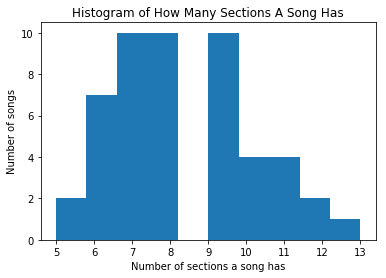

In [159]:
# looking at the length of songs and stats about that 

song_length = []
for row in range(len(songs['Structure'])):
    number = songs['Structure'][row].count(',') + 1
    song_length.append(number)

plt.hist(song_length)
plt.xlabel("Number of sections a song has")
plt.ylabel("Number of songs")
plt.title("Histogram of How Many Sections A Song Has")

song_length_stats = np.array(song_length)
print("The average song has " +str(song_length_stats.mean()) + " sections.")
print("The median of sections in a song is " + str(np.median(song_length_stats)))

In [160]:
# a function that returns what song has 'number' amount of sections in it

def what_songs_are_this_length(number):
    for row in range(len(songs['Structure'])):
        if songs['Structure'][row].count(',') + 1 == number:
            print(songs['Title'][row] + ' by ' + songs['Artist'][row])
            
print('These songs have 5 sections: ')
print("                             ")
what_songs_are_this_length(5)
print("=============================")
print('These songs have 8 sections: ')
print("                             ")
what_songs_are_this_length(8)
print("=============================")
print('These songs have 13 sections: ')
print("                             ")
what_songs_are_this_length(13)

These songs have 5 sections: 
                             
Say So by Doja Cat
The Box by Roddy Ricch
These songs have 8 sections: 
                             
Break My Heart by Dua Lipa
Before You Go by Lewis Capaldi
Intentions by Justin Bieber
Dance Monkey by Tones And I
Sunday Best by Surfaces
10,000 Hours by Dan + Shay & Justin Bieber
Mood by 24kGoldn
Only Human by Jonas Brothers
Truth Hurts by Lizzo
Graveyard by Halsey
These songs have 13 sections: 
                             
Supalonely by BENEE


Text(0.5,1,'Histogram of How Many Unique Sections a Song Has')

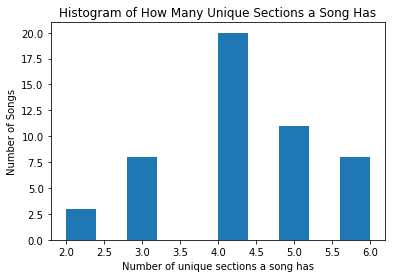

In [161]:
# looking at how many unique sections a song has

# all the possible sections
sections = ['Intro', 'Verse', 'Refrain', 'Pre-Chorus', 'Chorus', 
            'Post-Chorus', 'Interlude', 'Instrumental Bridge', 
            'Drop', 'Bridge',  'Outro']

# creating the list
song_uniqueness = []
for song in range(len(songs['Structure'])):
    unique = 0
    song_structure = songs['Structure'][song]
    # seeing if any of the sections are in the song structure
    for sect in range(len(sections)):     
        if sections[sect] in song_structure:
            unique += 1
    song_uniqueness.append(unique)
    
plt.hist(song_uniqueness)
plt.xlabel("Number of unique sections a song has")
plt.ylabel("Number of Songs")
plt.title("Histogram of How Many Unique Sections a Song Has")

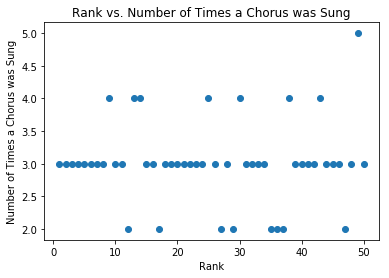

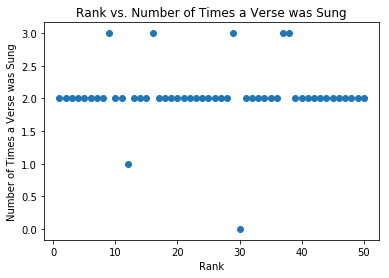

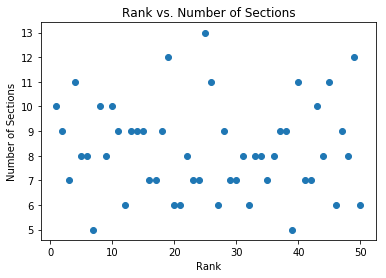

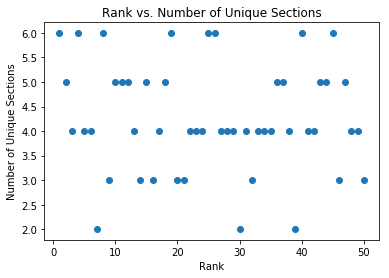

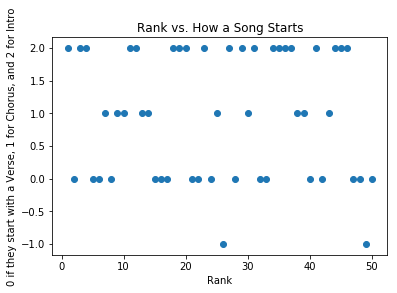

In [162]:
# Creating a scatter plot of number of choruses vs. rank
plt.scatter(songs['Rank'], array_for_song_structure("'Chorus")) # 'Chorus to differentiate btwn Post and Pre
plt.title('Rank vs. Number of Times a Chorus was Sung')
plt.xlabel('Rank')
plt.ylabel('Number of Times a Chorus was Sung')
plt.show()

# Creating a scatter plot of number of verses vs. rank
plt.scatter(songs['Rank'], array_for_song_structure("Verse")) 
plt.title('Rank vs. Number of Times a Verse was Sung')
plt.xlabel('Rank')
plt.ylabel('Number of Times a Verse was Sung')
plt.show()

# Creating a scatter plot of number of sections vs. rank
plt.scatter(songs['Rank'], song_length) 
plt.title('Rank vs. Number of Sections')
plt.xlabel('Rank')
plt.ylabel('Number of Sections')
plt.show()

# Creating a scatter plot of number of unique sections vs. rank
plt.scatter(songs['Rank'], song_uniqueness) 
plt.title('Rank vs. Number of Unique Sections')
plt.xlabel('Rank')
plt.ylabel('Number of Unique Sections')
plt.show()

# Creating a scatter plot of number of unique sections vs. rank
plt.scatter(songs['Rank'], starts) 
plt.title('Rank vs. How a Song Starts')
plt.xlabel('Rank')
plt.ylabel("0 if they start with a Verse, 1 for Chorus, and 2 for Intro")
plt.show()